In [246]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [247]:
df = pd.read_csv("C:/AI_File/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [248]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [249]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [250]:
df = df.drop(['Outcome'], axis=1)

# 컬럼 제거
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [251]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

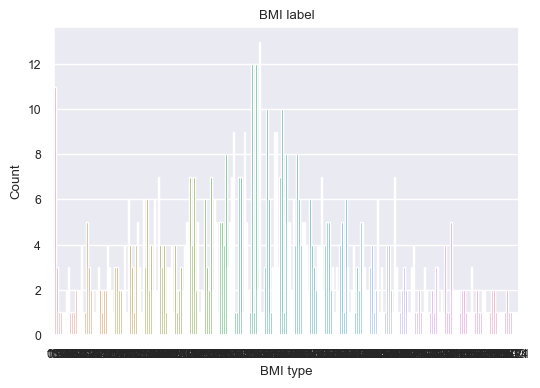

In [252]:
# 레이블 갯수 확인 (그래프)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="BMI")
plt.xlabel("BMI type")
plt.ylabel("Count")
plt.title("BMI label")
plt.show()

In [256]:
target_column = "BMI"  
X = df.drop(columns=[target_column]).values
y = df[target_column].values


In [257]:
# 데이터 분할 및 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [258]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((614, 7), (154, 7), (614,), (154,))

In [259]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [260]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [261]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [262]:

# 회귀 모델 정의
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
       
        self.fc1 = nn.Linear(7, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 1) 
    


    def forward(self, x):
      

        x = torch.relu(self.fc1(x))

        x = torch.relu(self.fc2(x))

        x = self.fc3(x)  # 활성화 함수 없이 출력

        return x


model = RegressionModel()

In [ ]:
#다른 형식    
#class RegressionModel(nn.Module):
#     def __init__(self):
#         super(RegressionModel, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(8, 32),
#             nn.ReLU(),
#             nn.Linear(32, 64),
#             nn.ReLU(),
#             nn.Linear(64, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Linear(32, 1)
#         )

#     def forward(self, x):
#         return self.model(x)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = RegressionModel().to(device)

## 손실함수 및 최적화

In [263]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 모델 학습

In [264]:
# Variables to store loss and accuracy
train_losses = []
test_losses = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float()) 

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {avg_test_loss:.4f}")

print("Training complete.")

Epoch 1/50, Train Loss: 984.3198, Test Loss: 763.5030
Epoch 2/50, Train Loss: 539.1229, Test Loss: 249.6689
Epoch 3/50, Train Loss: 141.4919, Test Loss: 92.9587
Epoch 4/50, Train Loss: 85.8883, Test Loss: 79.9578
Epoch 5/50, Train Loss: 78.0282, Test Loss: 74.9771
Epoch 6/50, Train Loss: 71.5611, Test Loss: 71.4974
Epoch 7/50, Train Loss: 69.2026, Test Loss: 68.0921
Epoch 8/50, Train Loss: 64.1212, Test Loss: 66.4496
Epoch 9/50, Train Loss: 61.4040, Test Loss: 64.8114
Epoch 10/50, Train Loss: 60.2232, Test Loss: 63.2702
Epoch 11/50, Train Loss: 57.5650, Test Loss: 61.5887
Epoch 12/50, Train Loss: 55.5947, Test Loss: 60.0176
Epoch 13/50, Train Loss: 53.5346, Test Loss: 59.0598
Epoch 14/50, Train Loss: 54.9260, Test Loss: 57.3275
Epoch 15/50, Train Loss: 51.2585, Test Loss: 57.6983
Epoch 16/50, Train Loss: 48.8891, Test Loss: 55.5981
Epoch 17/50, Train Loss: 49.3849, Test Loss: 54.3752
Epoch 18/50, Train Loss: 46.9334, Test Loss: 54.1793
Epoch 19/50, Train Loss: 46.5776, Test Loss: 54.76

In [266]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(outputs.squeeze().cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate MSE
mse = mean_squared_error(all_labels, all_predictions)

print(f'MSE: {mse:.4f}')
rmse = np.sqrt(mse)

# 출력
print(f"Test RMSE: {rmse:.4f}")

MSE: 49.6110
Test RMSE: 7.0435
